## Introduction

Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

We will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers.

## Understanding the Datasets

### Train vs. Test
`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data

Exploring, cleaning, validating, and visualizing the data to help determine and optimize the predictive model.

Missing Values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


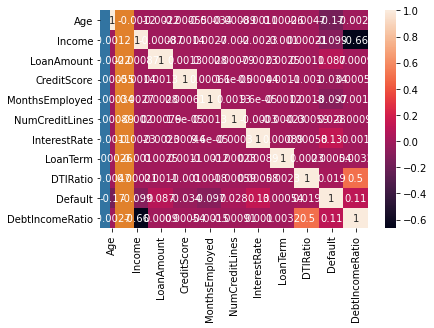

In [6]:
# Data Exploration
# Explore basic statistics of numeric features
train_df.describe()

# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Explore the distribution of the target variable
sns.countplot(x="Default", data=train_df)

# Data Cleaning
# Handle missing values (example: impute missing values with median for numeric columns)
train_df.fillna(train_df.median(), inplace=True)

# Feature Engineering (example: create a new feature 'DebtIncomeRatio')
train_df['DebtIncomeRatio'] = train_df['DTIRatio'] / train_df['Income']

# Data Visualization (example: visualize the correlation matrix)
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True)

# Data Validation (example: split data into train and validation sets)
X = train_df.drop(['LoanID', 'Default'], axis=1)
y = train_df['Default']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Make predictions

The dataframe named `prediction_df` is with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`.

`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate the target variable
X_train = train_df.drop(['LoanID', 'Default'], axis=1)
y_train = train_df['Default']

# Handle missing values (impute with median for numeric columns)
numeric_cols = X_train.select_dtypes(include=['number']).columns
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
test_df[numeric_cols] = test_df[numeric_cols].fillna(X_train[numeric_cols].median())

# Perform one-hot encoding for nominal categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Additional feature engineering (example: create more features)
X_train['NewFeature1'] = X_train['Income'] / X_train['LoanAmount']
test_df['NewFeature1'] = test_df['Income'] / test_df['LoanAmount']

# Experiment with a different machine learning algorithm (example: Gradient Boosting)
model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'max_depth': np.arange(3, 6),
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, scoring='roc_auc', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

# Use the trained model to make predictions on test data
predicted_probability = best_model.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

# Create prediction_df
prediction_df = pd.DataFrame({'LoanID': test_df['LoanID'], 'predicted_probability': predicted_probability})

# Ensure the exact column names and format
prediction_df = prediction_df[['LoanID', 'predicted_probability']]

# View prediction_df
print(prediction_df.shape)
prediction_df.head(10)